### Notebook Obejectives:
* Load and check the Xgboost model from pickle file
* Compare results with random and fixed samples

The model is already fitted with the scraper data and saved in pickle file

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle

In [11]:
data_test = pd.read_pickle("../resources/data_test.pkl")
compare_price = pd.read_pickle("../resources/comp_price.pkl")
print(data_test.shape)
print(compare_price.shape)

(8, 162)
(8, 164)


In [12]:
with open('../model_pickle', 'rb') as f:
    model = pickle.load(f)

[07:06:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
type(model)

xgboost.core.Booster

##### Model Benchmark 
* 22 test samples for 22 regions
* Real sell price
* Suitable for evaluation

In [14]:
to_predict = xgb.DMatrix(data_test.values, feature_names=data_test.columns)
compare_price.loc[:, 'model_price_prediction'] = list(model.predict(to_predict))
result_df = compare_price[['model_price_prediction', 'adj_price']]

result_df.adj_price = np.exp(result_df.adj_price)
result_df.model_price_prediction = np.exp(result_df.model_price_prediction)

pred_price_model = sum(list(result_df.loc[:, 'model_price_prediction']))
actual_price = sum(list(result_df.loc[:, 'adj_price']))

difference_model_actual = pred_price_model - actual_price
print('Predicted Price: ' + str(round(pred_price_model, 0)))
print('Actual Price: ' + str(actual_price))
print('Difference:')
print('Model Prediction - Actual Price: ' + str(round(difference_model_actual, 0)))
print(result_df)

Predicted Price: 969705.0
Actual Price: 988622.25
Difference:
Model Prediction - Actual Price: -18918.0
   model_price_prediction  adj_price
0           125125.912045  124687.50
1            95679.974734   95261.25
2            62136.945311   61446.00
3           199152.870632  183540.00
4           166411.147427  195709.50
5            59631.046113   66433.50
6           110121.304648  111919.50
7           151445.541407  149625.00


C:\Users\Angel\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### RMSE as evaluation - only for the benchmark

In [16]:
from sklearn.metrics import mean_squared_error

In [18]:
mse = mean_squared_error(result_df.adj_price, result_df.model_price_prediction)
mse_str = "MSE: " + str(mse)
rmse_str = "RMSE: " + str(np.sqrt(mse))
print(mse_str, rmse_str)

MSE: 144477673.77965304 RMSE: 12019.88659595643


<AxesSubplot:>

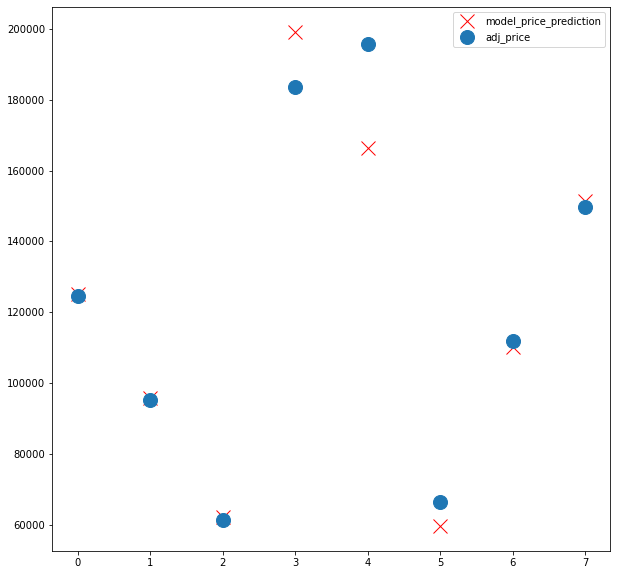

In [29]:
result_df.plot(style=['rx','o'], figsize=(10,10), markersize=14)

#### Save plot

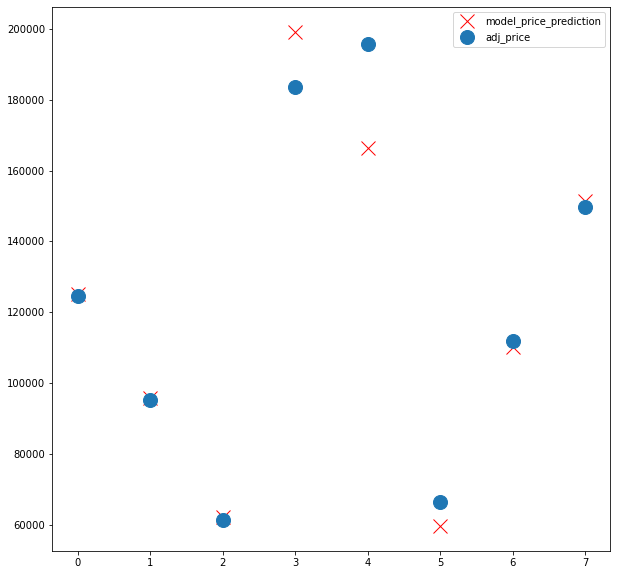

In [30]:
# plot = result_df.plot(style=['rx','o'], figsize=(10,10), markersize=14)
# fig = plot.get_figure()
# fig.savefig("model.png")